# Third cleaning pass 

* Parse date of reported salary

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999


import time
import unicodedata

import datetime
from datetime import timedelta, datetime

import csv
import os

import sys
sys.path.append('./lib/')
from functions import *

from tqdm import tnrange, tqdm_notebook
from unidecode import unidecode

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import glob

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

import locale
locale.setlocale(locale.LC_ALL, 'es_ES')

'es_ES'

# Import data

In [3]:
period = '20180210-3'

In [4]:
df = pd.read_csv('../data/output/02_scraped_data_clean_second_{}.csv'.format(period), encoding='utf-8', low_memory=False)

In [5]:
df.shape

(1954998, 24)

# Clean dates 

In [6]:
pd_preprocess(df)

### Fixing -allyear 

In [7]:
pd_runfix(pd_allyear, df, 'datets', 'yearmonth')

----BEFORE FIX ------
Coverage before fix:
No date timestamp column. Creating
False    1954998
Name: datets, dtype: int64
----AFTER FIX ------
Coverage before fix:
False    1641132
True      313866
Name: datets, dtype: int64
Improved: False   -313866.0
True          NaN
Name: datets, dtype: float64


### Year - Month

In [8]:
pd_runfix(pd_yearmonth, df, 'datets', 'yearmonth')

----BEFORE FIX ------
Coverage before fix:
False    1641132
True      313866
Name: datets, dtype: int64
----AFTER FIX ------
Coverage before fix:
True     1540590
False     414408
Name: datets, dtype: int64
Improved: False   -1226724
True     1226724
Name: datets, dtype: int64


### month-allyear 

In [9]:
pd_runfix(pd_monthallyear, df, 'datets', 'yearmonth')

----BEFORE FIX ------
Coverage before fix:
True     1540590
False     414408
Name: datets, dtype: int64
----AFTER FIX ------
Coverage before fix:
True     1662832
False     292166
Name: datets, dtype: int64
Improved: True     122242
False   -122242
Name: datets, dtype: int64


### Drop aux columns 

In [10]:
cols = [x for x in df.columns if 'aux' in x]
cols

['aux', 'aux2', 'aux3']

In [11]:
for c in cols:
    del df[c]

### what's left

In [12]:
df.loc[pd.isnull(df['datets']), 'yearmonth'].value_counts().sum()

43101

In [13]:
df.loc[pd.isnull(df['datets']), 'yearmonth'].value_counts()

2015-dotaciónacontrata2015                 7300
allyear-febrero                            1813
allyear-diciembre                          1792
allyear-enero                              1790
allyear-noviembre                          1772
allyear-octubre                            1760
allyear-septiembre                         1722
allyear-agosto                             1716
allyear-julio                              1690
allyear-junio                              1662
allyear-mayo                               1646
allyear-abril                              1598
allyear-marzo                              1498
2016-2012                                  1014
2013-dotaciónacontrata2013                  974
2014-dotaciónacontrata2014                  707
verhistórico-2012                           702
verhistórico-2011                           681
verhistórico-2013                           666
2016-2014                                   661
verhistórico-2016                       

# High-level date patterns 

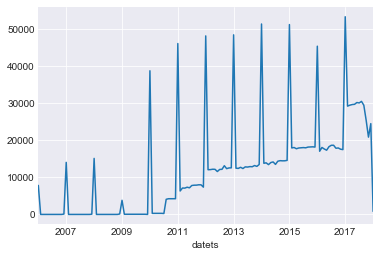

In [14]:
df.groupby(pd.Grouper(freq='M', key='datets'))['entity'].count().plot()

# Print out file

In [18]:
df.to_csv('../data/output/scraped_data_clean_third_{}.csv'.format(period), encoding='utf-8', sep='|', quoting=csv.QUOTE_ALL, index=False)

# Cleanup stats 

In [17]:
df['pd'] = df['datets'].isnull()
a = df.groupby(['entity', 'department', 'pd'])['entity'].count().unstack('pd')
a.columns = ['Data', 'noData']
a.sort_values(['noData', 'Data'], ascending=False)



,,Data,noData
entity,department,,
Ministerio de Justicia y Derechos Humanos,Gendarmería de Chile,8876.0,20459.0
Ministerio de Educación,Dotación a contrata,4149.0,8981.0
Ministerio del Interior y Seguridad Pública,Gobierno Regional de Los Ríos,1008.0,4236.0
Ministerio de Vivienda y Urbanismo,SERVIU III Región,5106.0,3703.0
Ministerio de Hacienda,Dirección de Presupuestos (DIPRES),421.0,2286.0
Ministerio del Trabajo y Previsión Social,Subsecretaría de Previsión Social,NaN,1378.0
Ministerio de Energía,Comisión Nacional de Energía (CNE),NaN,642.0
Ministerio de Defensa Nacional,Caja de Previsión de la Defensa Nacional (CAPREDENA),12543.0,606.0
Ministerio de Educación,Dotación de planta,227.0,498.0
